In [1744]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [1745]:
def ShowImage(img, gray):
    plt.axis("off")
    if gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.show()

In [1746]:
def cv2_show(caption, im):
    cv2.imshow(caption,im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [1747]:
def hist_img_v0(f):
    m, n = f.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[f[i, j]]+=1
    return np.array(h, dtype='uint16')

In [1748]:
def otsu(hist):
    tot = np.sum(hist)
    prob = hist/tot
    coef_max = -1
    thr = -1
    for t in range(1,255):
        w0 = np.sum(prob[:t]) + 0.00000001
        w1 = np.sum(prob[t:]) + 0.00000001
        i0 = np.array([i for i in range(t)])
        i1 = np.array([i for i in range(t,256)])
        u0 = np.sum(i0*prob[:t])/w0
        u1 = np.sum(i1*prob[t:])/w1

        coef = (w0*w1)*np.power(u0-u1,2)
        if  coef > coef_max:
            coef_max = coef
            thr = t
    return thr

In [1749]:
def intermean(hist, t, st, en):
    tot = np.sum(hist[st:en])
    prob = hist/tot
    w0 = np.sum(prob[st:t+1]) + 0.0000001
    #w1 = np.sum(prob[t+1:en])
    w1 = (1 - w0) +  + 0.0000001
    i0 = np.array([i for i in range(st,t+1)])
    i1 = np.array([i for i in range(t+1, en)])
    u0 = np.sum(i0*prob[st:t+1])/w0
    u1 = np.sum(i1*prob[t+1:en])/w1
    if u0 == 0.0:
        thr = u1
    elif u1 == 0.0:
        thr = u0
    else:
        thr = (u0+u1)/2
    return thr.astype(np.uint8)    

In [1750]:
def gamma_correction(img, gamma):
    img = img.astype(np.float64)/np.amax(img)
    gamma_img = img**gamma
    return np.array(255*gamma_img, dtype = 'uint8')

In [1751]:
def split_sub_image(img):
    # print(img.shape)
    h, w = img.shape
    w_cutoff = w // 2
    img_left = img[:,:w_cutoff]
    img_right = img[:,w_cutoff:]
    return img_left, img_right 

In [1752]:
img = cv2.imread('./images/document.jpg', 0)

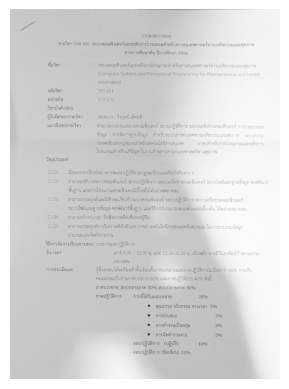

In [1753]:
gamma = gamma_correction(img, 0.3)
ShowImage(gamma, 1)

# Split

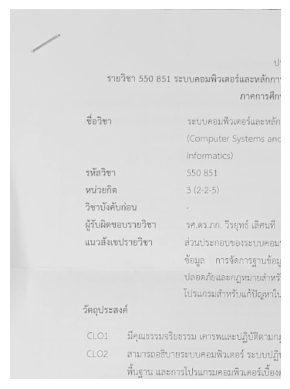

In [1754]:
sub1, sub2 = split_sub_image(gamma)
sub1_1, sub1_2 = split_sub_image((sub1.transpose()))
sub1_1 = sub1_1.transpose()
ShowImage(sub1_1, 1)

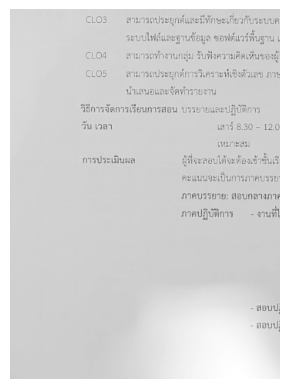

In [1755]:
sub1_2 = sub1_2.transpose()
ShowImage(sub1_2, 1)

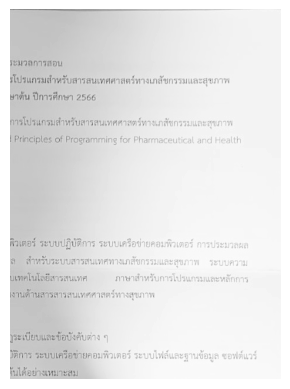

In [1756]:
sub2_1, sub2_2 = split_sub_image((sub2.transpose()))
sub2_1 = sub2_1.transpose()
ShowImage(sub2_1, 1)

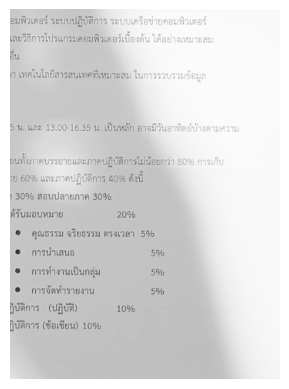

In [1757]:
sub2_2 = sub2_2.transpose()
ShowImage(sub2_2, 1)

## sub1_1

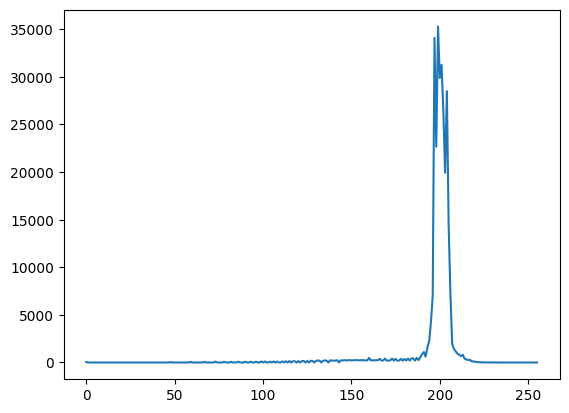

In [1758]:
hist = hist_img_v0(sub1_1)
plt.plot(hist)

171


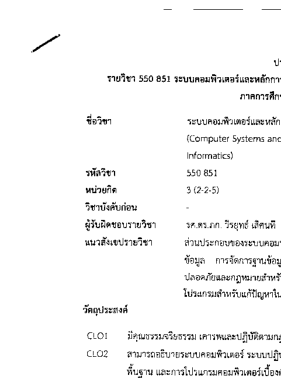

In [1759]:
thr = otsu(hist)
print(thr)
result_sub1_1 = np.zeros_like(sub1_1)
result_sub1_1[sub1_1 > thr] = 255
result_sub1_1[sub1_1 <= thr] = 0
ShowImage(result_sub1_1, 1)

## sub1_2

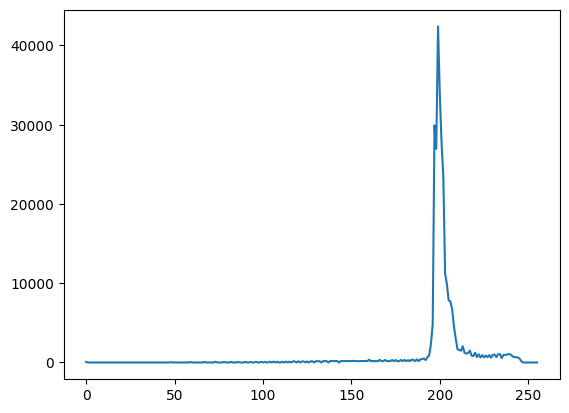

In [1760]:
hist = hist_img_v0(sub1_2)
plt.plot(hist)

172


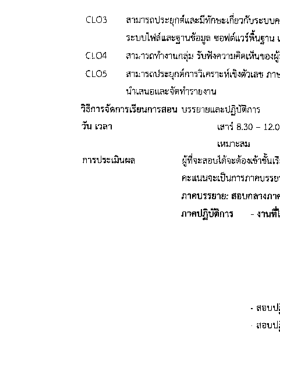

In [1761]:
thr = otsu(hist)
print(thr)
result_sub1_2 = np.zeros_like(sub1_2)
result_sub1_2[sub1_2 > thr] = 255
result_sub1_2[sub1_2 <= thr] = 0
ShowImage(result_sub1_2, 1)

## sub2_1

In [1762]:
sub1, sub2 = split_sub_image(sub2_1)
sub2_1_1, sub2_1_2 = split_sub_image((sub1.transpose()))
sub2_1_1 = sub2_1_1.transpose()
sub2_1_2 = sub2_1_2.transpose()
sub2_1_3, sub2_1_4 = split_sub_image((sub2.transpose()))
sub2_1_3 = sub2_1_3.transpose()
sub2_1_4 = sub2_1_4.transpose()

181


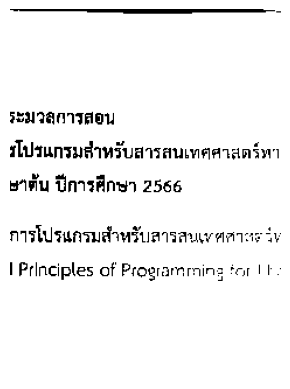

In [1763]:
# ShowImage(sub2_1_1, 1)
hist = hist_img_v0(sub2_1_1)
thr = otsu(hist)
print(thr)
result_sub2_1_1 = np.zeros_like(sub2_1_1)
result_sub2_1_1[sub2_1_1 > thr] = 255
ShowImage(result_sub2_1_1, 1)

[128, 160, 176, 183, 185, 186, 187, 187] 187


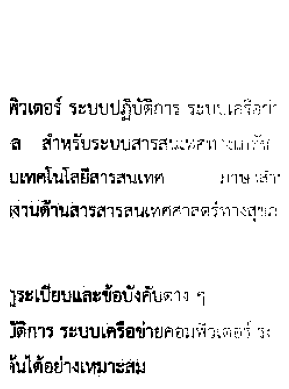

In [1764]:
hist = hist_img_v0(sub2_1_2)
tol = 1
st, en = 0, 256
for t in range(1):
    flag = True
    T = []
    #t0 = random.randint(st, en)
    t0 = int((st+en)*0.5)
    T.append(t0)
    while(flag):
        t1 = intermean(hist[st:en], t0, st, en)
        T.append(t1)
        #print(t0, t1)
        if abs(t1-t0) < tol :
            flag = False
        else:
            t0 = t1
    thr = T[-1]
    en = thr+1
    print(T, thr)
result_sub2_1_2 = np.zeros_like(sub2_1_2)
result_sub2_1_2[sub2_1_2 > thr] = 255
ShowImage(result_sub2_1_2, 1)

216


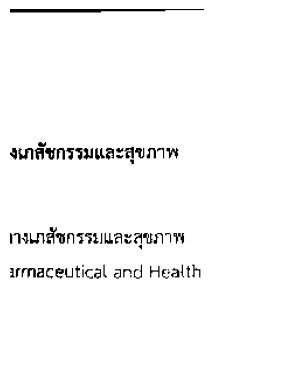

In [1765]:
hist = hist_img_v0(sub2_1_3)
thr = otsu(hist)
print(thr)
result_sub2_1_3 = np.zeros_like(sub2_1_3)
result_sub2_1_3[sub2_1_3 > thr] = 255
ShowImage(result_sub2_1_3, 1)

225


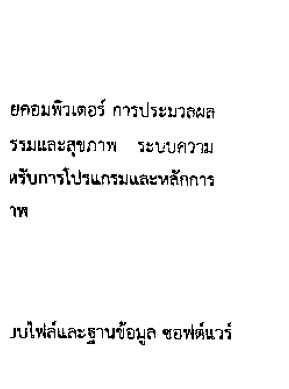

In [1766]:
hist = hist_img_v0(sub2_1_4)
thr = otsu(hist)
print(thr)
result_sub2_1_4 = np.zeros_like(sub2_1_4)
result_sub2_1_4[sub2_1_4 > thr] = 255
ShowImage(result_sub2_1_4, 1)

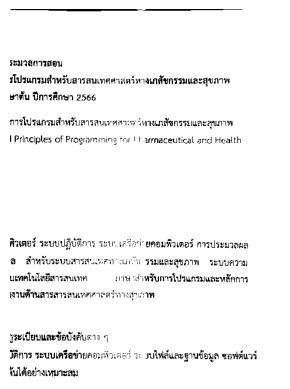

In [1767]:
result_sub2_1 = np.zeros_like(sub2_1, dtype='uint8')
h, w = sub2_1.shape
wc, hc = w // 2, h // 2
result_sub2_1[:hc,:wc] = result_sub2_1_1
result_sub2_1[hc:,:wc] = result_sub2_1_2
result_sub2_1[:hc,wc:] = result_sub2_1_3
result_sub2_1[hc:,wc:] = result_sub2_1_4
ShowImage(result_sub2_1, 1)

## sub2_2

In [1768]:
sub1, sub2 = split_sub_image(sub2_2)
sub2_2_1, sub2_2_2 = split_sub_image((sub1.transpose()))
sub2_2_1 = sub2_2_1.transpose()
sub2_2_2 = sub2_2_2.transpose()
sub2_2_3, sub2_2_4 = split_sub_image((sub2.transpose()))
sub2_2_3 = sub2_2_3.transpose()
sub2_2_4 = sub2_2_4.transpose()

184


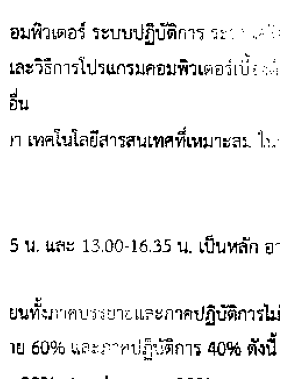

In [1769]:
sub2_2_1 = gamma_correction(sub2_2_1, 0.9)
hist = hist_img_v0(sub2_2_1)
thr = otsu(hist)
print(thr)
result_sub2_2_1 = np.zeros_like(sub2_2_1)
result_sub2_2_1[sub2_2_1 > thr] = 255
ShowImage(result_sub2_2_1, 1)

156


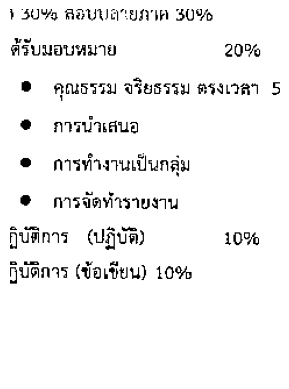

In [1770]:
hist = hist_img_v0(sub2_2_2)
thr = otsu(hist)
print(thr)
result_sub2_2_2 = np.zeros_like(sub2_2_2)
result_sub2_2_2[sub2_2_2 > thr] = 255
ShowImage(result_sub2_2_2, 1)

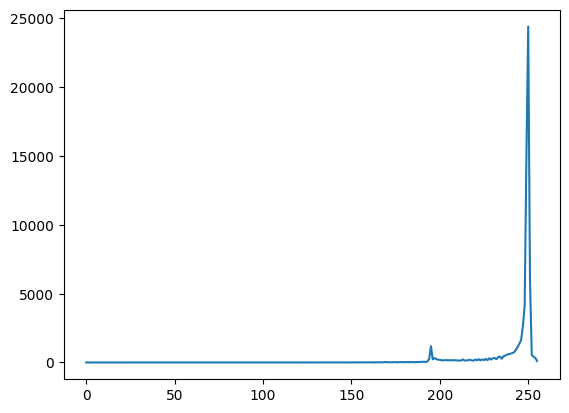

In [1771]:
hist = hist_img_v0(sub2_2_3)
plt.plot(hist)

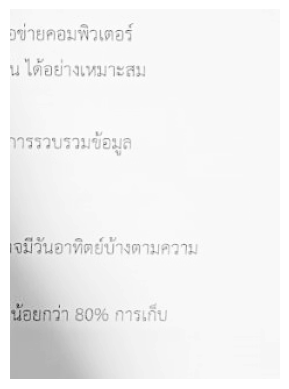

In [1777]:
ShowImage(sub2_2_3, 1)

[128, 181, 204, 217, 225, 228, 229, 229] 229


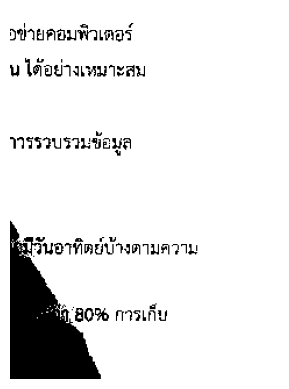

In [1772]:
sub2_2_3 = gamma_correction(sub2_2_3, 0.8)
hist = hist_img_v0(sub2_2_3)
tol = 1
st, en = 0, 256
for t in range(1):
    flag = True
    T = []
    #t0 = random.randint(st, en)
    t0 = int((st+en)*0.5)
    T.append(t0)
    while(flag):
        t1 = intermean(hist[st:en], t0, st, en)
        T.append(t1)
        #print(t0, t1)
        if abs(t1-t0) < tol :
            flag = False
        else:
            t0 = t1
    thr = T[-1]
    en = thr+1
    print(T, thr)
result_sub2_2_3 = np.zeros_like(sub2_2_3)
result_sub2_2_3[sub2_2_3 > thr] = 255
ShowImage(result_sub2_2_3, 1)

[128, 151, 175, 195, 205, 208, 210, 210] 210


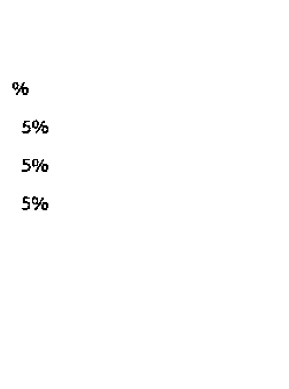

In [1773]:
sub2_2_4 = gamma_correction(sub2_2_4, 0.5)
hist = hist_img_v0(sub2_2_4)
tol = 1
st, en = 0, 256
for t in range(1):
    flag = True
    T = []
    #t0 = random.randint(st, en)
    t0 = int((st+en)*0.5)
    T.append(t0)
    while(flag):
        t1 = intermean(hist[st:en], t0, st, en)
        T.append(t1)
        #print(t0, t1)
        if abs(t1-t0) < tol :
            flag = False
        else:
            t0 = t1
    thr = T[-1]
    en = thr+1
    print(T, thr)
result_sub2_2_4 = np.zeros_like(sub2_2_4)
result_sub2_2_4[sub2_2_4 > thr] = 255
ShowImage(result_sub2_2_4, 1)

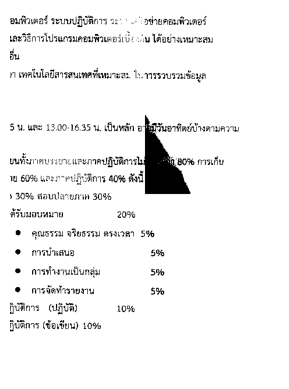

In [1774]:
result_sub2_2 = np.zeros_like(sub2_2, dtype='uint8')
h, w = sub2_2.shape
wc, hc = w // 2, h // 2
result_sub2_2[:hc,:wc] = result_sub2_2_1
result_sub2_2[hc:,:wc] = result_sub2_2_2
result_sub2_2[:hc,wc:] = result_sub2_2_3
result_sub2_2[hc:,wc:] = result_sub2_2_4
ShowImage(result_sub2_2, 1)

# Merge

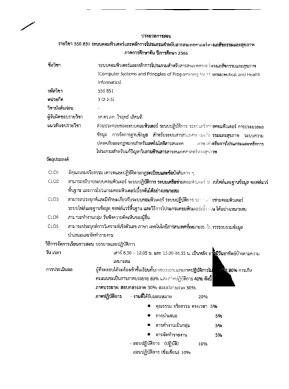

In [1775]:
final_result = np.zeros_like(img, dtype='uint8')
h, w = img.shape
wc, hc = w // 2, h // 2
final_result[:hc,:wc] = result_sub1_1
final_result[hc:,:wc] = result_sub1_2
final_result[:hc,wc:] = result_sub2_1
final_result[hc:,wc:] = result_sub2_2
ShowImage(final_result, 1)

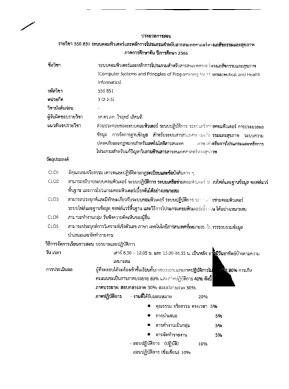

In [1776]:
plt.axis('off')
plt.imshow(final_result, cmap='gray')
plt.savefig('./outs/Final_1.png')